# Labeling Attack Data Based on Experiment Heuristics

- Labeling benign traffic as label=0, and malcicious traffic as label=1

In [1]:
import pandas as pd

## Attack 1

This dataset is really small.. I honestly dont think its worth the time to figure out labeling...

In [61]:
attack1 = pd.read_parquet("./attack1_parquet/")

In [62]:
attack1

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
0,2023-10-05 11:07:43.148,2023-10-05T07:07:44.205,52.96.191.114,None,443,0,75.41.1.200,None,2578,NaN,...,<none>,6,0,0,0,53.493000,39.191002,0.334,13122,23
1,2023-10-05 11:07:43.148,2023-10-05T07:07:44.210,75.41.1.200,None,2578,0,52.96.191.114,None,443,NaN,...,<none>,6,0,0,0,53.493000,39.191002,0.334,8425,26
2,2023-10-05 11:07:58.124,2023-10-05T07:07:58.239,151.101.183.5,None,443,0,75.41.1.200,None,44738,NaN,...,<none>,6,0,0,0,0.051000,0.186000,0.328,5256,114
3,2023-10-05 11:07:58.152,2023-10-05T07:08:04.358,40.99.245.82,None,443,0,75.41.1.200,None,9456,NaN,...,<none>,6,0,0,0,58.747002,140.871994,0.264,225604,232
4,2023-10-05 11:07:58.124,2023-10-05T07:07:58.239,75.41.1.200,None,44738,0,151.101.183.5,None,443,NaN,...,<none>,6,0,0,0,0.051000,0.186000,0.328,189139,142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,2023-10-05 15:15:35.440,2023-10-05T11:15:35.47,10.200.2.9,None,22,0,10.200.2.1,None,4516,NaN,...,<none>,6,0,0,0,3.079000,0.014000,0.133,168,5
722,2023-10-05 15:14:57.906,2023-10-05T11:14:57.906,10.200.2.9,None,68,0,10.200.2.1,None,67,NaN,...,<none>,17,0,0,0,0.000000,0.000000,0.000,300,1
723,2023-10-05 15:15:35.440,2023-10-05T11:15:35.44,10.200.2.9,None,80,0,10.200.2.1,None,44698,NaN,...,<none>,6,0,0,0,0.000000,0.000000,0.166,40,1
724,2023-10-05 15:17:02.306,2023-10-05T11:17:02.787,10.200.2.9,None,35824,0,34.117.65.55,None,443,NaN,...,<none>,6,0,0,0,0.131000,239.903000,0.285,200,4


## Attack 2

All traffic is benign except:
1) students and michael logging into server31 to start their attacks
2) Outbound from server31 (10.200.4.19)
    - This traffic is the students attacking the metasploit box and the cowrie honeypot. 
3) Outbound from michael on LDAP box (10.200.1.105) to Metasploit box (10.200.5.12)


In [2]:
attack2 = pd.read_parquet("./attack2_parquet/")

In [3]:
meta='10.200.5.12'  # metasploit box, the destination of the attacks in attack 2
server31='10.200.4.19'  # origin of student attacks that were attacking metasploit box 
michael_src='10.200.1.105' # origin of michael's attacks that were attacking metasploit box
cowrie = '10.200.2.9' # cowrie honeypot, which was attacked FROM server 31

In [4]:
attack2['label'] = 0

In [5]:
attack2.head()

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
0,2023-10-10 13:30:54.499,2023-10-10T09:30:54.592,10.200.0.1,None,39935,0,10.200.0.102,None,80,NaN,...,0,6,0,0,0,0.230,0.018,0.132,104518,76
1,2023-10-10 13:45:11.604,2023-10-10T09:45:11.821,10.200.0.1,None,61029,0,10.200.0.102,None,80,NaN,...,0,6,0,0,0,0.231,0.015,0.108,353,4
2,2023-10-10 13:00:25.922,2023-10-10T09:00:25.922,10.200.0.102,None,22,0,10.200.0.1,None,20562,NaN,...,0,6,0,0,0,0.000,0.000,0.132,40,1
3,2023-10-10 13:00:25.923,2023-10-10T09:00:26.68,10.200.0.102,None,80,0,10.200.0.1,None,22382,NaN,...,0,6,0,0,0,0.242,0.008,0.131,301,6
4,2023-10-10 14:30:47.630,2023-10-10T10:30:47.103,10.200.0.102,None,80,0,10.200.0.1,None,26170,NaN,...,0,6,0,0,0,0.001,0.003,0.000,224,7


### Inbound from the public internet on port 65530

These are the students logging into server 31 via SSH in order to run their commands

In [24]:
attack2[attack2['dst_port'] == 65530].sort_values(by='t_last')

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
1831919,2023-10-10 12:51:50.464,2023-10-10T08:51:56.643,70.112.193.254,None,61367,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,1.113000,49.862000,0.257,2141,13
1831916,2023-10-10 12:52:48.293,2023-10-10T08:54:21.258,70.112.193.254,None,4263,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,5.194000,60.151001,0.236,9745,117
1464237,2023-10-10 12:58:03.512,2023-10-10T08:58:04.24,64.189.110.227,None,45485,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,11.880000,44.499001,0.212,1953,10
1464274,2023-10-10 12:58:25.620,2023-10-10T08:59:17.305,70.112.193.254,None,4263,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,0.530000,196.162003,0.550,6080,83
549008,2023-10-10 13:00:35.637,2023-10-10T09:00:42.687,70.112.193.254,None,4263,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,0.384000,9.765000,0.228,804,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731618,2023-10-10 14:20:12.671,2023-10-10T10:20:13.832,24.160.16.132,None,57625,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,941.870972,104.554001,0.406,120,2
1928665,2023-10-10 14:20:17.382,2023-10-10T10:20:24.346,24.160.16.132,None,57625,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,236.582993,94.585999,0.384,816,14
1280754,2023-10-10 14:22:04.377,2023-10-10T10:22:27.837,24.160.16.132,None,57625,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,157.677002,94.639999,0.361,3000,39
1097280,2023-10-10 14:24:21.737,2023-10-10T10:25:03.372,24.160.16.132,None,57625,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,1384.298950,86.680000,0.565,5136,69


In [101]:
attack2[attack2['dst_port'] == 65534].groupby('dst4_addr').count() # students logging in

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst6_addr,dst_port,icmp_code,icmp_status,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
dst4_addr,,,,,,,,,,,,,,,,,,,,,
10.200.1.105,5,5,5,0,5,5,0,5,0,0,...,5,5,5,5,5,5,5,5,5,5
75.41.1.200,14,14,14,0,14,14,0,14,0,0,...,14,14,14,14,14,14,14,14,14,14


In [100]:
attack2[attack2['dst_port'] == 65530].groupby('src4_addr').count() # these are the student source IPs

,t_first,t_last,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,icmp_status,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
src4_addr,,,,,,,,,,,,,,,,,,,,,
104.54.195.69,30,30,0,30,30,30,0,30,0,0,...,30,30,30,30,30,30,30,30,30,30
108.194.50.82,28,28,0,28,28,28,0,28,0,0,...,28,28,28,28,28,28,28,28,28,28
128.62.41.209,30,30,0,30,30,30,0,30,0,0,...,30,30,30,30,30,30,30,30,30,30
172.56.92.252,21,21,0,21,21,21,0,21,0,0,...,21,21,21,21,21,21,21,21,21,21
172.56.93.41,1,1,0,1,1,1,0,1,0,0,...,1,1,1,1,1,1,1,1,1,1
209.166.121.147,29,29,0,29,29,29,0,29,0,0,...,29,29,29,29,29,29,29,29,29,29
209.166.122.206,45,45,0,45,45,45,0,45,0,0,...,45,45,45,45,45,45,45,45,45,45
209.166.122.37,32,32,0,32,32,32,0,32,0,0,...,32,32,32,32,32,32,32,32,32,32
209.166.122.61,30,30,0,30,30,30,0,30,0,0,...,30,30,30,30,30,30,30,30,30,30


### Outbound from server31 (10.200.4.19)

- These are the student scans/attacks originating from server31, targeting the metasploit box (10.200.5.12) and the cowrie honeypot (10.200.2.9)

In [97]:
#attack2[attack2['src4_addr'] == '10.200.4.19']

In [98]:
#attack2[attack2['src4_addr'] == '10.200.4.19'].groupby('dst4_addr').count().sort_values(by='t_first', ascending=False)

In [8]:
# label as malicious

def malicious(src4_addr, dst4_addr, dst_port):
    if (src4_addr=='10.200.4.19' and dst4_addr=='10.200.5.12'): # students attacking metasploit box
        label=1
    elif (src4_addr=='10.200.4.19' and dst4_addr=='10.200.2.9'): # students attacking cowrie honeypot
        label=1
    #elif (dst_port == 65530 and dst4_addr=='75.41.1.200'): # students logging in
    #    label=1
    elif (src4_addr=='10.200.1.105' and dst4_addr=='10.200.5.12'): # Michael attacking metasploit box
        label=1
    #elif (dst_port == 65534 and (dst4_addr=='75.41.1.200' or dst4_addr=='10.200.1.105')): # Michael logging in
     #   label=1
    else:
        label=0
    return label






In [9]:
attack2['label'] = attack2.apply(lambda x: malicious(x['src4_addr'], x['dst4_addr'], x['dst_port']), axis=1)

In [109]:
#attack2.groupby('label').count()

In [11]:
attack2.label.value_counts()

label
0    1182285
1     746577
Name: count, dtype: int64

In [28]:
747500/(1181362+747500)

0.38753420410584066

In [10]:
attack2.to_parquet('attack2_labeled_benign_logins.parquet')

In [111]:
new_attack2 = pd.read_parquet('attack2_labeled.parquet')

In [112]:
len(new_attack2)

1928862

In [113]:
len(attack2)

1928862

In [6]:
df = attack2[attack2['label']==1]

In [23]:
attack2[attack2['label']==1].sort_values(by='t_last')#, ascending=False)

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
1831919,2023-10-10 12:51:50.464,2023-10-10T08:51:56.643,70.112.193.254,None,61367,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,1.113000,49.862000,0.257,2141,13
1831916,2023-10-10 12:52:48.293,2023-10-10T08:54:21.258,70.112.193.254,None,4263,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,5.194000,60.151001,0.236,9745,117
1464237,2023-10-10 12:58:03.512,2023-10-10T08:58:04.24,64.189.110.227,None,45485,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,11.880000,44.499001,0.212,1953,10
1464274,2023-10-10 12:58:25.620,2023-10-10T08:59:17.305,70.112.193.254,None,4263,0,75.41.1.200,None,65530,NaN,...,1,6,0,0,0,0.530000,196.162003,0.550,6080,83
183152,2023-10-10 12:59:50.250,2023-10-10T08:59:59.82,24.179.168.183,None,54513,0,75.41.1.200,None,65534,NaN,...,1,6,0,0,0,10.605000,92.017998,0.172,4719,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564458,2023-10-10 14:25:34.931,2023-10-10T10:27:45.829,10.200.4.19,None,48146,0,10.200.2.9,None,22,NaN,...,1,6,0,0,0,0.670000,0.182000,0.181,7783,64
564457,2023-10-10 14:25:34.931,2023-10-10T10:27:45.829,10.200.4.19,None,48146,0,10.200.2.9,None,22,NaN,...,1,6,0,0,0,0.675000,0.175000,0.210,7783,64
564456,2023-10-10 14:25:34.931,2023-10-10T10:27:45.829,10.200.4.19,None,48146,0,10.200.2.9,None,22,NaN,...,1,6,0,0,0,0.675000,0.175000,0.210,7783,64
564459,2023-10-10 14:25:34.931,2023-10-10T10:27:45.829,10.200.4.19,None,48146,0,10.200.2.9,None,22,NaN,...,1,6,0,0,0,0.670000,0.182000,0.181,7783,64


In [14]:
df2 = attack2[attack2['label']==0]

In [15]:
df2.sort_values(by='t_first')#, ascending=False)

,t_first,t_last,src4_addr,src6_addr,src_port,src_tos,dst4_addr,dst6_addr,dst_port,icmp_code,...,label,proto,sampled,export_sysid,fwd_status,app_latency,cli_latency,srv_latency,out_bytes,out_packets
1361526,2023-10-10 12:38:01.453,2023-10-10T08:39:55.954,10.200.4.19,None,29385,0,10.99.0.100,None,3525,NaN,...,0,6,0,0,0,0.791,3012.833984,0.256,40,2
1361527,2023-10-10 12:38:01.453,2023-10-10T08:38:04.466,10.200.4.19,None,29385,0,10.99.0.100,None,3525,NaN,...,0,6,0,0,0,0.816,3012.809082,0.270,3040,64
1361525,2023-10-10 12:38:01.453,2023-10-10T08:39:55.954,10.200.4.19,None,29385,0,10.99.0.100,None,3525,NaN,...,0,6,0,0,0,0.791,3012.833984,0.256,3040,64
1463906,2023-10-10 12:38:01.453,2023-10-10T08:39:52.995,10.99.0.100,None,3525,0,10.200.4.19,None,29385,NaN,...,0,6,0,0,0,0.791,3012.833984,0.256,110202,150
1463905,2023-10-10 12:38:01.453,2023-10-10T08:39:52.995,10.99.0.100,None,3525,0,10.200.4.19,None,29385,NaN,...,0,6,0,0,0,0.791,3012.833984,0.256,6348,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647304,2023-10-10 14:32:56.468,2023-10-10T10:32:56.536,10.99.0.100,None,34500,0,10.99.0.1,None,53,NaN,...,0,6,0,0,0,0.132,0.412000,0.016,236,6
365339,2023-10-10 14:32:56.468,2023-10-10T10:32:56.536,10.99.0.1,None,53,0,10.99.0.100,None,34500,NaN,...,0,6,0,0,0,0.132,0.412000,0.016,179,6
1647221,2023-10-10 14:32:56.468,2023-10-10T10:32:56.505,10.99.0.1,None,53,0,10.99.0.100,None,34499,NaN,...,0,6,0,0,0,0.163,0.286000,0.028,179,6
1647370,2023-10-10 14:33:15.547,2023-10-10T10:33:15.547,142.251.116.95,None,443,0,10.99.0.100,None,33753,NaN,...,0,6,0,0,0,0.000,0.000000,0.359,20,1


<Axes: xlabel='t_first', ylabel='label'>

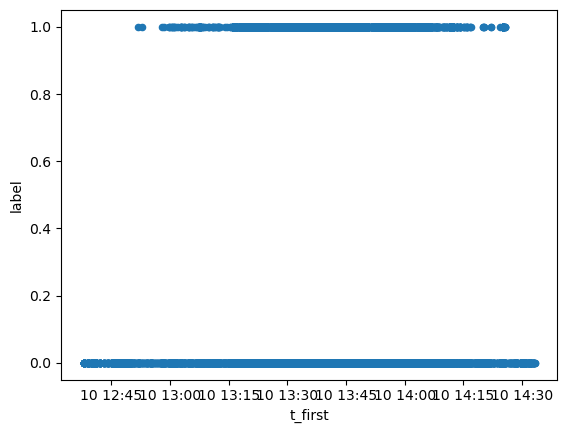

In [21]:
attack2.plot('t_first', 'label', kind='scatter')